In [1]:
description_file_path = r"D:\Internship\PRODIGY\Task3\bank-additional-names.txt"

with open(description_file_path, 'r', encoding='utf-8') as file:
    content = file.read()
    print(content)

﻿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This

In [2]:
import pandas as pd

data_file_path = r"D:\Internship\PRODIGY\Task3\bank-additional-full.csv"

df = pd.read_csv(data_file_path, sep=';')

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print(f"\nDataset Shape: {df.shape}")

First 5 rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.con

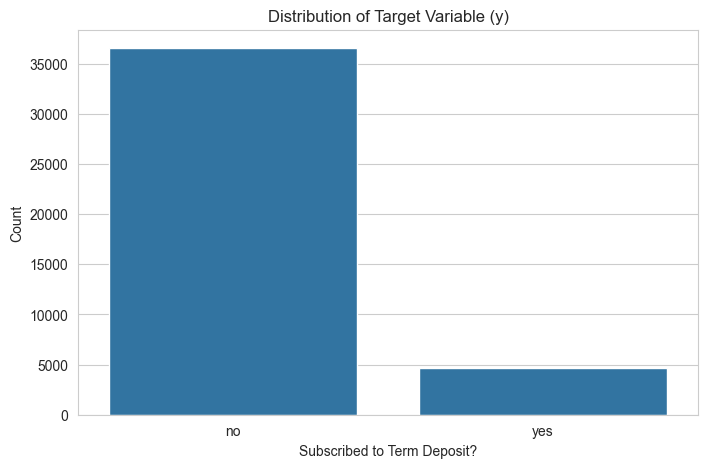

Value counts for target variable 'y':
y
no     36548
yes     4640
Name: count, dtype: int64

Percentage distribution:
y
no     88.734583
yes    11.265417
Name: count, dtype: float64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribed to Term Deposit?')
plt.ylabel('Count')
plt.show()

target_counts = df['y'].value_counts()
print("Value counts for target variable 'y':")
print(target_counts)
print("\nPercentage distribution:")
print((target_counts / len(df)) * 100)

In [4]:
categorical_columns = df.select_dtypes(include=['object']).columns

print("Checking for 'unknown' values in categorical columns:")
for col in categorical_columns:
    if 'unknown' in df[col].unique():
        unknown_count = (df[col] == 'unknown').sum()
        print(f"Column '{col}' has {unknown_count} 'unknown' values ({unknown_count/len(df)*100:.2f}%)")

Checking for 'unknown' values in categorical columns:
Column 'job' has 330 'unknown' values (0.80%)
Column 'marital' has 80 'unknown' values (0.19%)
Column 'education' has 1731 'unknown' values (4.20%)
Column 'default' has 8597 'unknown' values (20.87%)
Column 'housing' has 990 'unknown' values (2.40%)
Column 'loan' has 990 'unknown' values (2.40%)


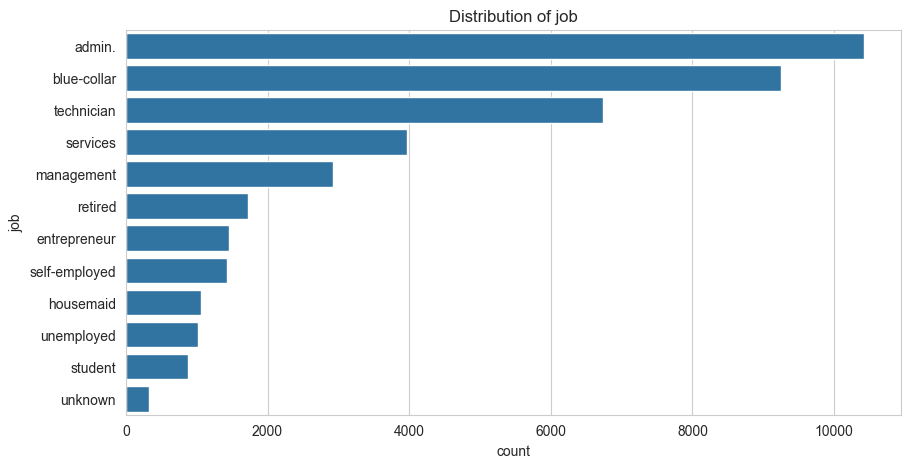

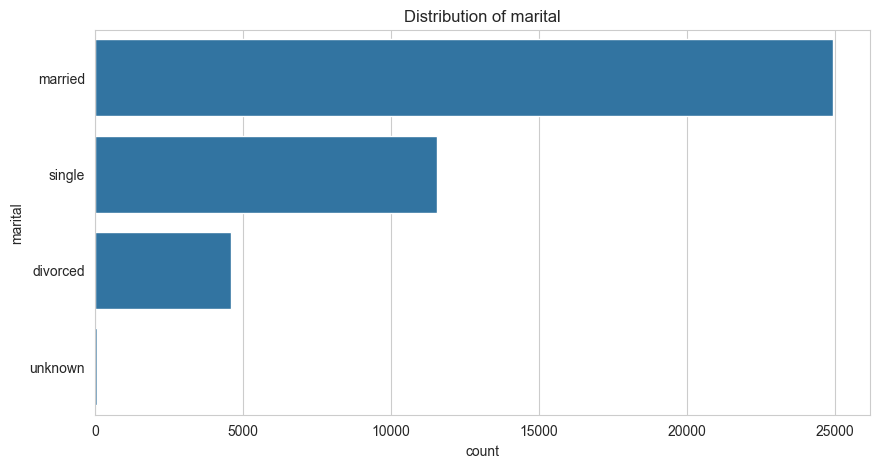

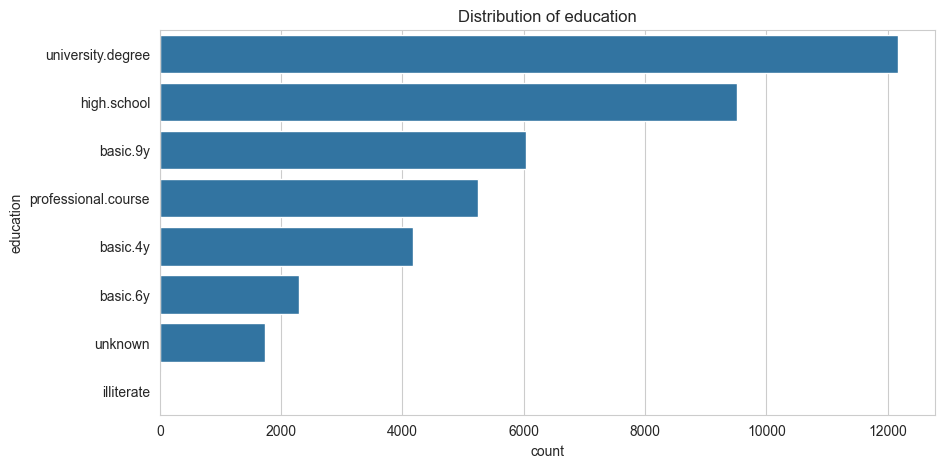

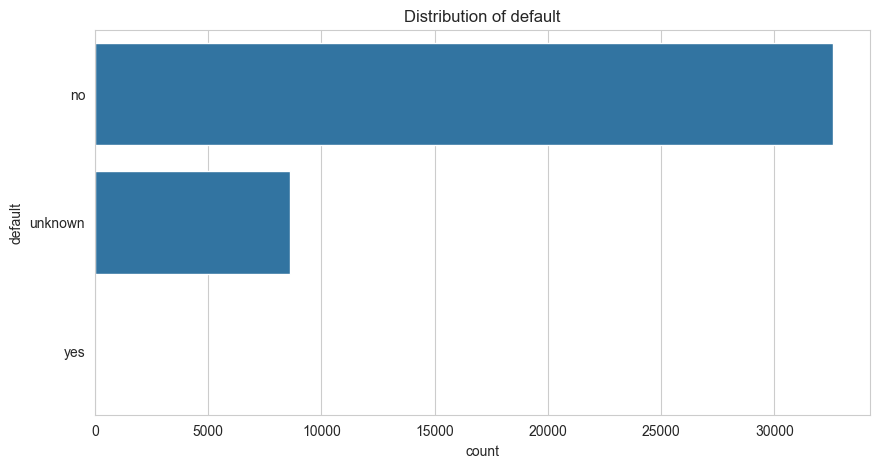

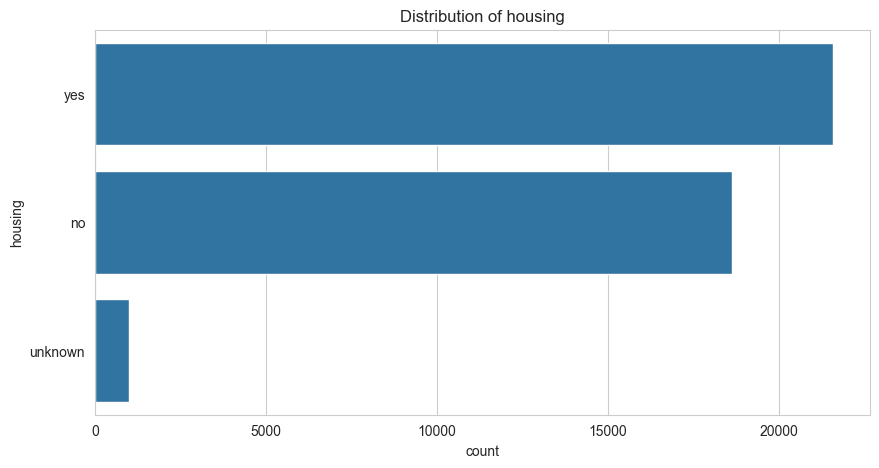

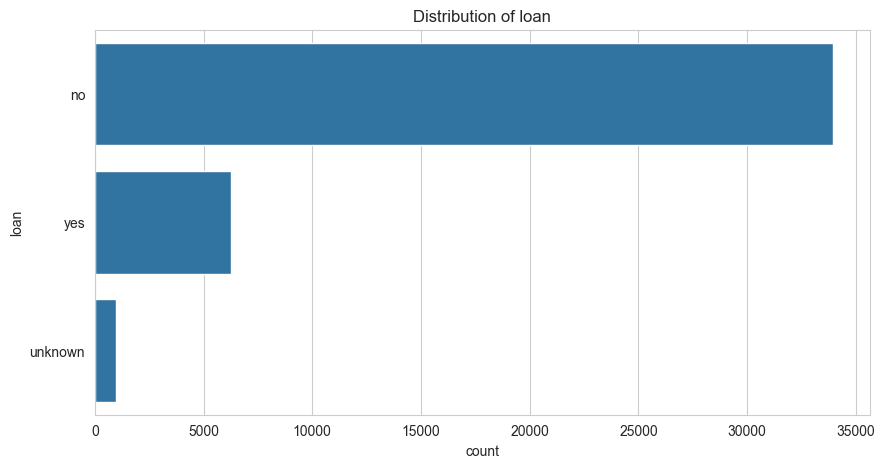

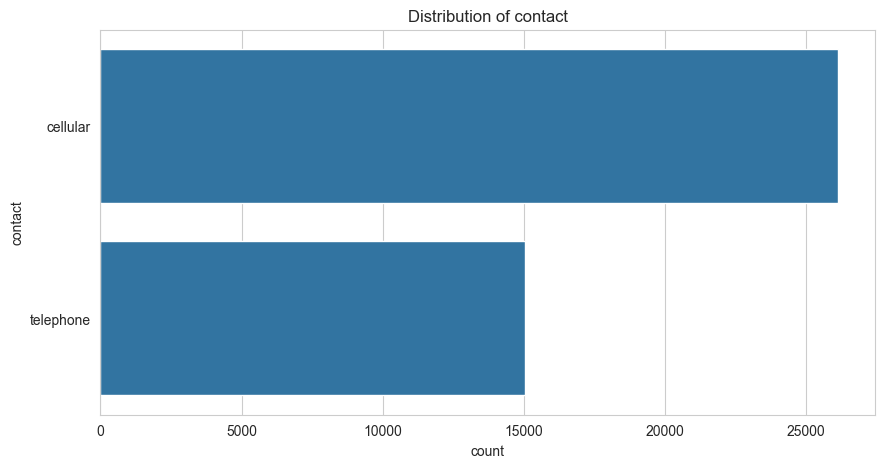

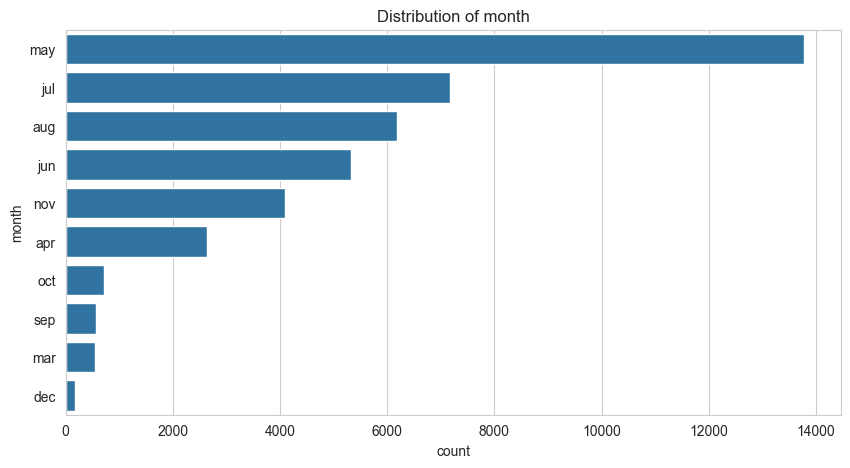

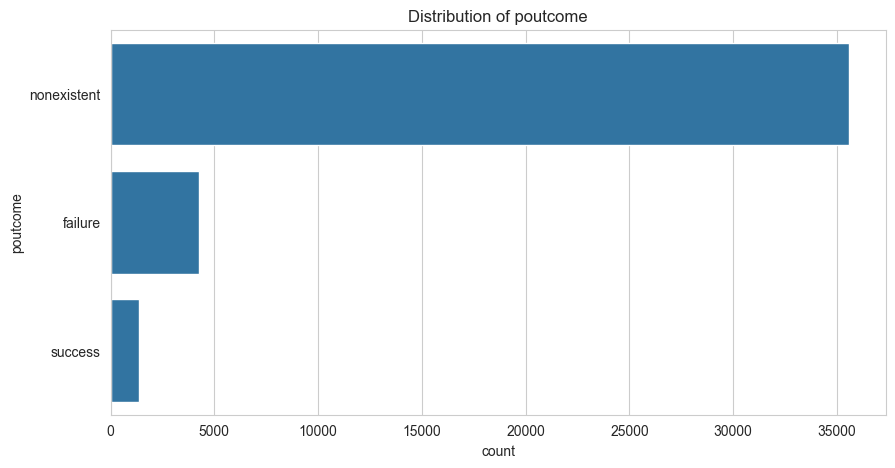

In [5]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for feature in cat_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.show()

Descriptive statistics for numerical features:
               age      duration      campaign         pdays      previous
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000
mean      40.02406    258.285010      2.567593    962.475454      0.172963
std       10.42125    259.279249      2.770014    186.910907      0.494901
min       17.00000      0.000000      1.000000      0.000000      0.000000
25%       32.00000    102.000000      1.000000    999.000000      0.000000
50%       38.00000    180.000000      2.000000    999.000000      0.000000
75%       47.00000    319.000000      3.000000    999.000000      0.000000
max       98.00000   4918.000000     56.000000    999.000000      7.000000


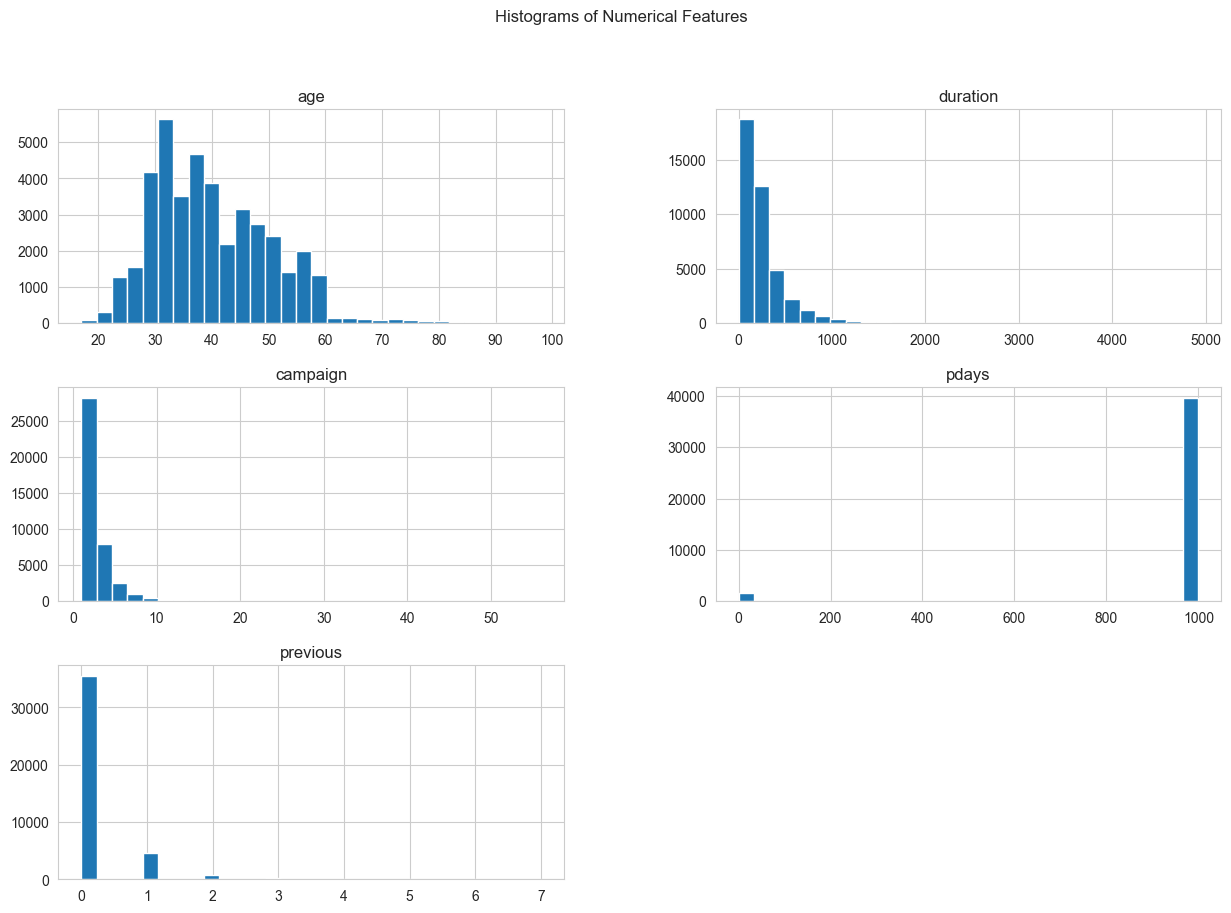

In [6]:
numerical_features = df.select_dtypes(include=['int64']).columns

print("Descriptive statistics for numerical features:")
print(df[numerical_features].describe())

df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [7]:
df_clean = df.drop(columns=['duration'])
print("'duration' column dropped.")
print(f"New dataset shape: {df_clean.shape}")

'duration' column dropped.
New dataset shape: (41188, 20)


In [8]:
columns_with_unknown = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

for col in columns_with_unknown:
    mode_val = df_clean[col][df_clean[col] != 'unknown'].mode()[0]
    df_clean[col] = df_clean[col].replace('unknown', mode_val)
    print(f"Replaced 'unknown' values in '{col}' with '{mode_val}'.")

print("\nVerification - 'unknown' value count in processed columns:")
for col in columns_with_unknown:
    unknown_count = (df_clean[col] == 'unknown').sum()
    print(f"Column '{col}': {unknown_count} 'unknown' values remaining.")

Replaced 'unknown' values in 'job' with 'admin.'.
Replaced 'unknown' values in 'marital' with 'married'.
Replaced 'unknown' values in 'education' with 'university.degree'.
Replaced 'unknown' values in 'default' with 'no'.
Replaced 'unknown' values in 'housing' with 'yes'.
Replaced 'unknown' values in 'loan' with 'no'.
Replaced 'unknown' values in 'poutcome' with 'nonexistent'.

Verification - 'unknown' value count in processed columns:
Column 'job': 0 'unknown' values remaining.
Column 'marital': 0 'unknown' values remaining.
Column 'education': 0 'unknown' values remaining.
Column 'default': 0 'unknown' values remaining.
Column 'housing': 0 'unknown' values remaining.
Column 'loan': 0 'unknown' values remaining.
Column 'poutcome': 0 'unknown' values remaining.


In [9]:
X = df_clean.drop(columns=['y'])  # All columns except the target
y = df_clean['y']  # The target column

from sklearn.preprocessing import LabelEncoder

label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)
print("Target variable 'y' encoded. ('no'=0, 'yes'=1)")
print(pd.Series(y_encoded).value_counts())

X_encoded = pd.get_dummies(X, drop_first=True)

print("\nOriginal number of features in X:", X.shape[1])
print("Number of features after One-Hot Encoding:", X_encoded.shape[1])
print("\nFirst 3 rows of the encoded features:")
print(X_encoded.head(3))

Target variable 'y' encoded. ('no'=0, 'yes'=1)
0    36548
1     4640
Name: count, dtype: int64

Original number of features in X: 19
Number of features after One-Hot Encoding: 46

First 3 rows of the encoded features:
   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar  ...  month_may  \
0          -36.4      4.857       5191.0            False  ...       True   
1          -36.4      4.857       5191.0            False  ...       True   
2          -36.4      4.857       5191.0            False  ...       True   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0      False      False      False             True            False   
1      False      False      False             True         

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Data splitting complete.")
print(f"Training set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing set shape : X_test {X_test.shape}, y_test {y_test.shape}")
print(f"\nProportion of 'yes' in training set: {y_train.mean():.3f}")
print(f"Proportion of 'yes' in testing set:  {y_test.mean():.3f}")

Data splitting complete.
Training set shape: X_train (32950, 46), y_train (32950,)
Testing set shape : X_test (8238, 46), y_test (8238,)

Proportion of 'yes' in training set: 0.113
Proportion of 'yes' in testing set:  0.113


In [11]:
from sklearn.tree import DecisionTreeClassifier

base_dt_model = DecisionTreeClassifier(random_state=42)

base_dt_model.fit(X_train, y_train)

print("Baseline Decision Tree model trained successfully.")

Baseline Decision Tree model trained successfully.


In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_train_pred = base_dt_model.predict(X_train)
y_test_pred = base_dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Baseline Model Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")

Baseline Model Performance:
Training Accuracy: 0.9948
Testing Accuracy:  0.8452


In [13]:
print("\nDetailed Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred, target_names=['No (0)', 'Yes (1)']))


Detailed Classification Report for Test Set:
              precision    recall  f1-score   support

      No (0)       0.92      0.91      0.91      7310
     Yes (1)       0.33      0.35      0.34       928

    accuracy                           0.85      8238
   macro avg       0.62      0.63      0.63      8238
weighted avg       0.85      0.85      0.85      8238



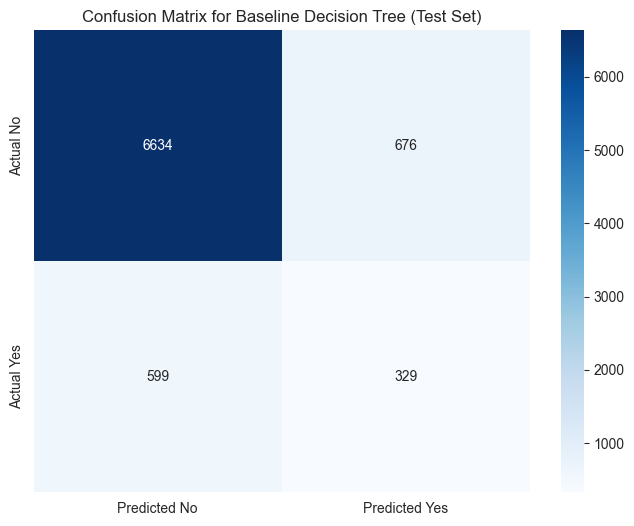

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix for Baseline Decision Tree (Test Set)')
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'class_weight': ['balanced']
}

dt_model_tune = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt_model_tune,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1)

print("Starting Grid Search... (This may take a few minutes)")
grid_search.fit(X_train, y_train)
print("Grid Search complete!")

print("\nBest Hyperparameters Found:")
print(grid_search.best_params_)

best_dt_model = grid_search.best_estimator_

Starting Grid Search... (This may take a few minutes)
Grid Search complete!

Best Hyperparameters Found:
{'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 20}



Tuned Model - Classification Report for Test Set:
              precision    recall  f1-score   support

      No (0)       0.95      0.91      0.93      7310
     Yes (1)       0.45      0.59      0.51       928

    accuracy                           0.87      8238
   macro avg       0.70      0.75      0.72      8238
weighted avg       0.89      0.87      0.88      8238



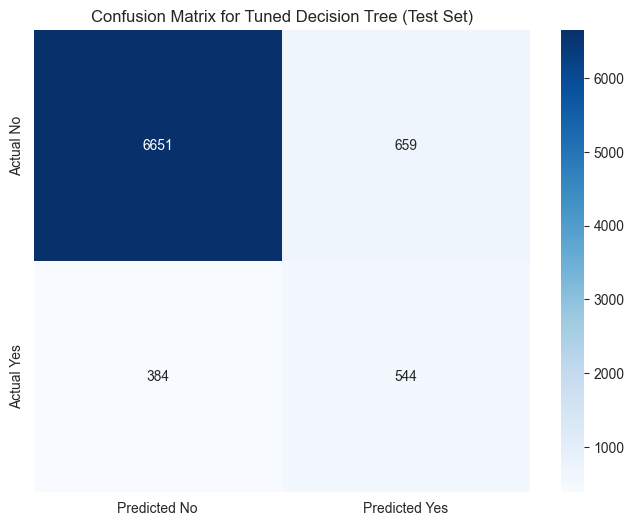


Baseline Test Accuracy: 0.8452
Tuned Model Test Accuracy: 0.8734


In [16]:
y_test_pred_tuned = best_dt_model.predict(X_test)

print("\nTuned Model - Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred_tuned, target_names=['No (0)', 'Yes (1)']))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_tuned),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix for Tuned Decision Tree (Test Set)')
plt.show()

tuned_test_accuracy = accuracy_score(y_test, y_test_pred_tuned)
print(f"\nBaseline Test Accuracy: {test_accuracy:.4f}")
print(f"Tuned Model Test Accuracy: {tuned_test_accuracy:.4f}")

Top 10 Most Important Features:
                        Feature  Importance
8                   nr.employed    0.702132
6                 cons.conf.idx    0.141148
5                cons.price.idx    0.057419
7                     euribor3m    0.033938
38                    month_oct    0.022464
2                         pdays    0.016909
26  education_university.degree    0.009529
30            contact_telephone    0.004699
1                      campaign    0.003514
0                           age    0.002774


C:\Users\ANANNYA DUTTA\AppData\Local\Temp\ipykernel_16076\3768436334.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')


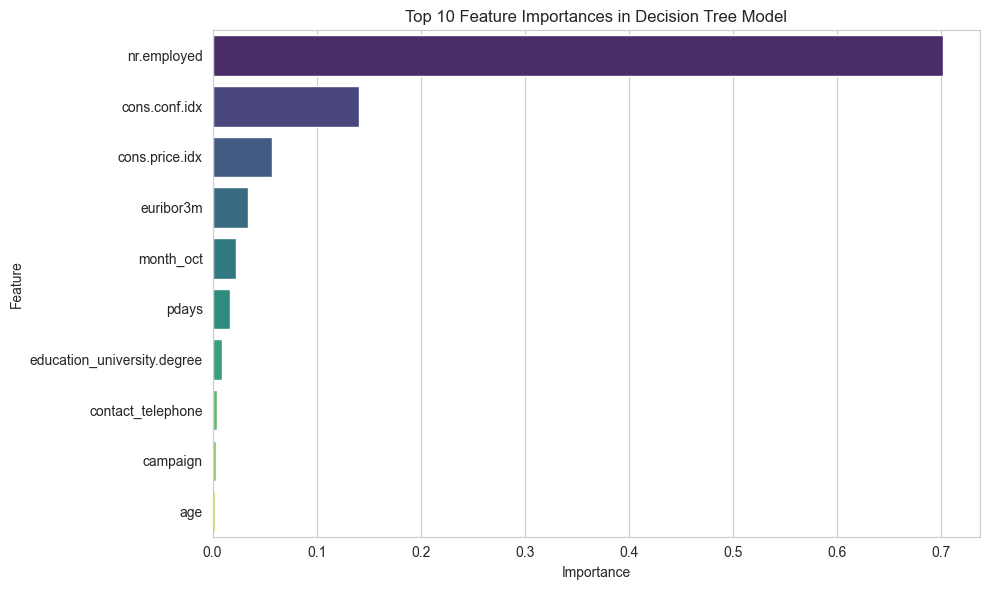

In [17]:
feature_importances = best_dt_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values('Importance', ascending=False)

print("Top 10 Most Important Features:")
print(features_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances in Decision Tree Model')
plt.tight_layout()
plt.show()

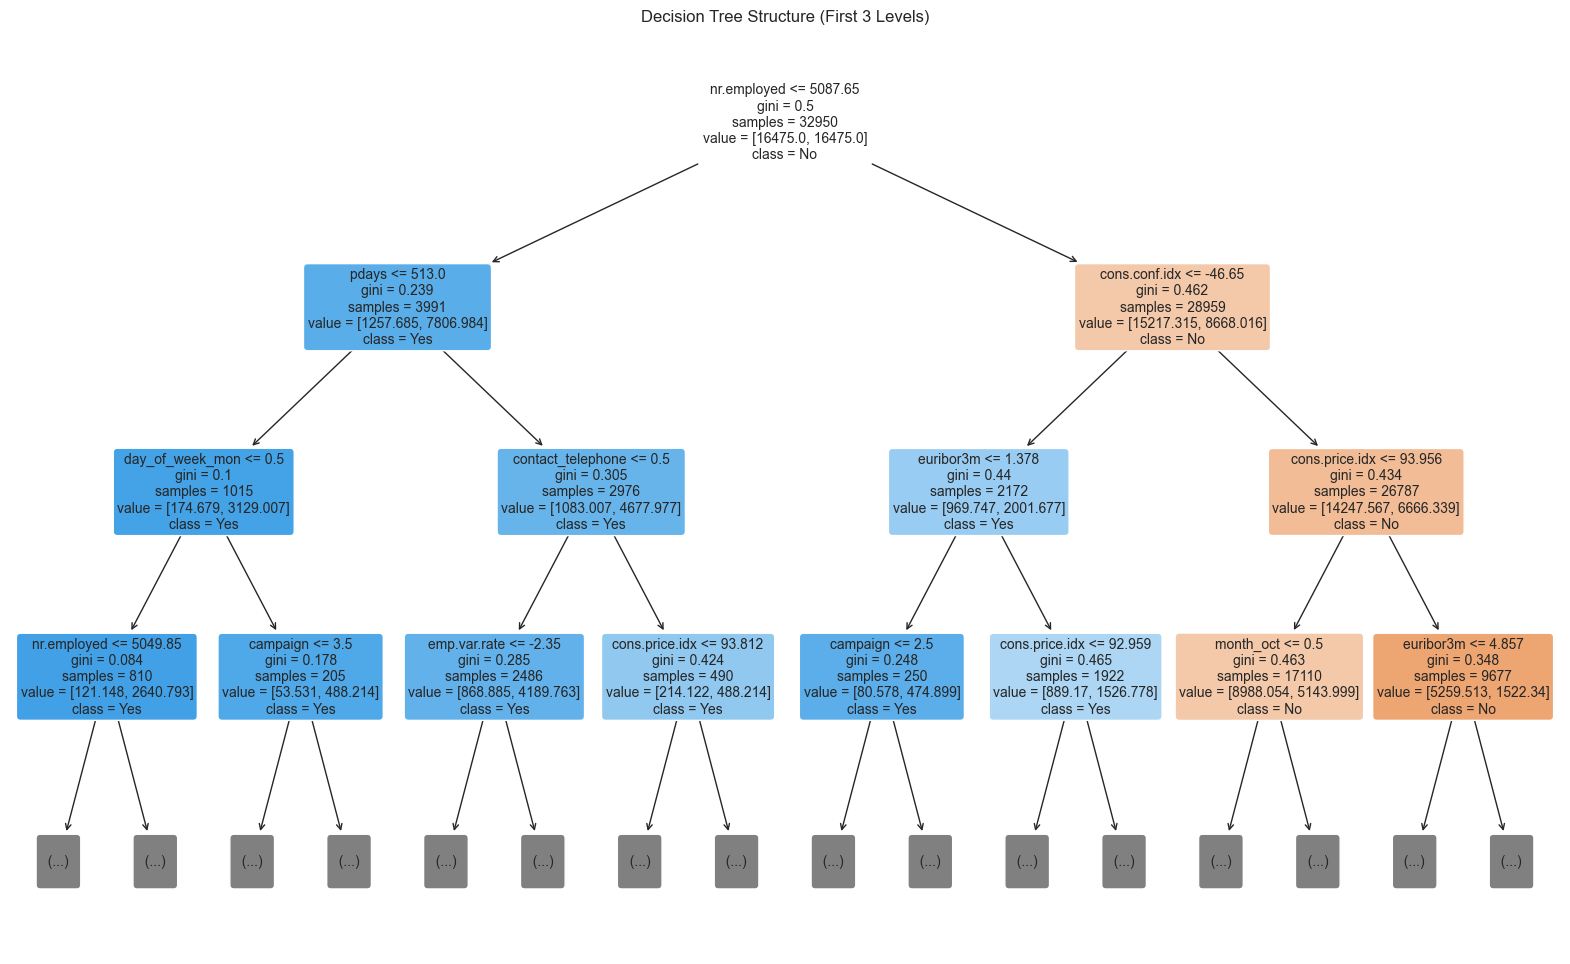

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(best_dt_model,
          feature_names=X_encoded.columns,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          max_depth=3,
          fontsize=10)
plt.title("Decision Tree Structure (First 3 Levels)")
plt.show()

In [19]:
n_nodes = best_dt_model.tree_.node_count
print(f"Number of nodes in the tuned tree: {n_nodes}")

tree_depth = best_dt_model.get_depth()
print(f"Depth of the tuned tree: {tree_depth}")

Number of nodes in the tuned tree: 61
Depth of the tuned tree: 5


In [20]:
from sklearn.metrics import precision_recall_fscore_support

def get_yes_metrics(y_true, y_pred):
    precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, labels=[1])
    return precision[0], recall[0], fscore[0]

base_precision, base_recall, base_f1 = get_yes_metrics(y_test, y_test_pred)
tuned_precision, tuned_recall, tuned_f1 = get_yes_metrics(y_test, y_test_pred_tuned)

comparison = pd.DataFrame({
    'Model': ['Baseline (Overfit)', 'Tuned (Generalized)'],
    'Overall Test Accuracy': [test_accuracy, tuned_test_accuracy],
    'Precision (Yes)': [base_precision, tuned_precision],
    'Recall (Yes)': [base_recall, tuned_recall],
    'F1-Score (Yes)': [base_f1, tuned_f1]
})

print("FINAL MODEL COMPARISON")
print("======================")
print(comparison.to_string(index=False))

FINAL MODEL COMPARISON
              Model  Overall Test Accuracy  Precision (Yes)  Recall (Yes)  F1-Score (Yes)
 Baseline (Overfit)               0.845229         0.327363      0.354526        0.340404
Tuned (Generalized)               0.873392         0.452203      0.586207        0.510558
